# VLE of glassy polymers

This is an example for a VLE calculation featuring an ASD and water (Figure 3 of https://doi.org/10.3390/pharmaceutics14061181). 

In [1]:
import numpy as np
from diffusionpy import vpure,lngi,NETVLE
import matplotlib.pyplot as plt
from scipy.optimize import root,root_scalar

In [2]:
RHexp2 = np.asarray([9.24,29.39,44.49,59.9,73.44,87.81])
wwDL00=np.asarray([2.60172,7.96358,12.56039,17.41136,23.22512,33.00029])
wwDL02=np.asarray([2.01804,5.82007,9.00199,12.8181,17.31054,25.96267])
wwDL05=np.asarray([0.88812,2.45168,3.71775,5.45077,7.80249,12.48117])
wwDL10=np.asarray([0.08671,0.38691,0.70874,1.12984,1.63972,2.43159])

In [3]:
par={'mi':np.asarray([1.20469,1045.99,14.2829768]),
'si':np.asarray([2.797059952,2.71,3.535]),
'ui':np.asarray([353.95,205.599,262.791]),
'eAi':np.asarray([2425.67,0.,886.44]),
'kAi':np.asarray([0.04509,0.02,0.02]),
'NAi':np.asarray([1.,231.,3.]),
'Mi':np.asarray([18.015,25700.,357.79]),
'kij':np.asarray([-0.128,-0.025,0.]),
'kijA':np.asarray([0.,0.,0.])}
T=298.15
p=1E5
par['vpure']=vpure(p,T,**par)

In [4]:
netpar={'v0p': np.asarray([-1.,663.7*1E-6,0]),
'ksw':np.asarray([0.4279,0.,0.])}

In [5]:

npoint=30

ww=np.linspace(0.0001,0.4,npoint)
dlvec=np.asarray([0.,0.2,0.5,1.])
# wi0,wi02,wi05,wi1=[np.asarray([ww,(1-ww)*(1-DL),(1-ww)*DL]) for DL in dlvec]

# RHvecnet=np.asarray([NETVLE(T,wi,**netpar,**par) for wi in wi0.T])[:,0]
# RHvecsaft=np.asarray([np.exp(lngi(T,wi,**par)+np.log(wi)) for wi in wi0.T])[:,0]

def calc_isotherm(DL):
    RHvecsaft=[]
    RHvecnet=[]
    for i,vali in enumerate(ww):
        wASD=(1-vali)
        wi=np.asarray([vali,wASD*(1-DL),wASD*DL])
        RHnet=NETVLE(T,wi,**netpar,**par)
        RHsaft=np.exp(lngi(T,wi,**par)+np.log(wi))
        RHvecnet.append(RHnet[0])
        RHvecsaft.append(RHsaft[0])
    RHvecnet=np.asarray(RHvecnet)
    RHvecsaft=np.asarray(RHvecsaft)
    return RHvecnet,RHvecsaft

D:\Temp\ipykernel_8896\3068379221.py:17: RuntimeWarning: divide by zero encountered in log
  RHsaft=np.exp(lngi(T,wi,**par)+np.log(wi))
C:\GitHub_Projects\diffusionpy\diffusionpy\PCSAFT.py:175: RuntimeWarning: invalid value encountered in log
  return logRS-np.log(RS)


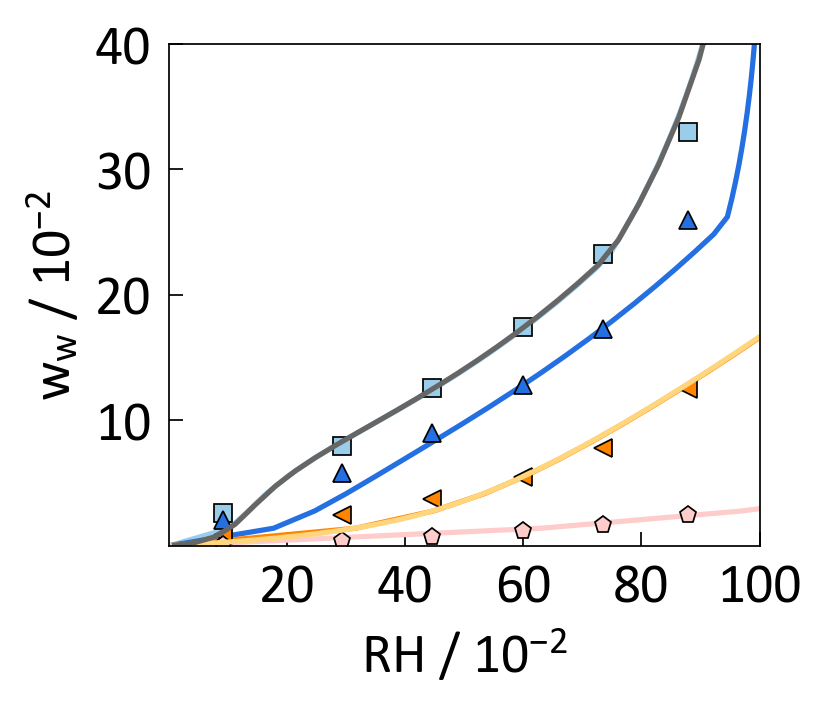

In [6]:
dlvec=np.asarray([0.,0.2,0.5,1.])
fmtvec=["C1","C2","C3","C4"]
fig,ax=plt.subplots()
for i,val in enumerate(dlvec):
    RHvecnet,RHvecsaft=calc_isotherm(val)
    if val==1.:
        RHvec=RHvecsaft.copy()
    else:
        RHvec=RHvecnet.copy() 
        RHvec[RHvec>RHvecsaft]=RHvecsaft[RHvec>RHvecsaft]
    ax.plot(RHvec*100,ww*100,fmtvec[i]+'-')
ax.plot(RHexp2,wwDL00,'C1s')
ax.plot(RHexp2,wwDL02,'C2^')
ax.plot(RHexp2,wwDL05,'C3<')
ax.plot(RHexp2,wwDL10,'C4p')    
plt.xlim([0,100]) 
plt.ylim([0,40]) 
ax.set_xticks([20,40,60,80,100])
ax.set_yticks([10,20,30,40])
# origin_like.set_ticks(ax,0,100,0,40)
ax.set_xlabel("RH / $10^{-2}$")
ax.set_ylabel("$w_w$ / $10^{-2}$")

a=[1,4.41379,7.82759,11.24138,14.65517,18.06897,21.48276,24.89655,28.31034,31.72414,35.13793,38.55172,41.96552,45.37931,48.7931,52.2069,55.62069,59.03448,62.44828,65.86207,69.27586,72.68966,76.10345,79.51724,82.93103,86.34483,89.75862,93.17241,96.58621,100]
b=[0.02506,0.11614,0.21692,0.3292,0.45521,0.59766,0.75984,0.9457,1.15992,1.40794,1.69588,2.03036,2.41806,2.86507,3.37598,3.95304,4.59556,5.29999,6.06058,6.87047,7.72278,8.61142,9.53145,10.47917,11.45198,12.44821,13.46687,14.50748,15.56993,16.65438]
c=[1,4.41379,7.82759,11.24138,14.65517,18.06897,21.48276,24.89655,28.31034,31.72414,35.13793,38.55172,41.96552,45.37931,48.7931,52.2069,55.62069,59.03448,62.44828,65.86207,69.27586,72.68966,76.10345,79.51724,82.93103,86.34483,89.75862,93.17241,96.58621,100]
d=[0.0382,0.24858,0.70415,1.70387,3.26372,4.74536,5.97541,7.04049,8.01501,8.94559,9.86182,10.78353,11.72481,12.69628,13.70637,14.76212,15.86968,17.03466,18.26234,19.55787,20.92639,22.3731,24.36964,27.1885,30.3952,34.15096,38.74594,44.79461,54.08444,99.99949]
ax.plot(a,b,'C5-') 
ax.plot(c,d,'C6-') 
